## Introduction

A figure is made of one or several __`axes`__ objects. In practice, an ax is the zone where the chart is drawn.

The properties of an ax can be modified before after the data is plotted. 




Here is a description of the different customizable features of an ax:


![axe_anatomy_resized](figures/axe_anatomy_resized.png)

## Adding titles, labels, annotations, ...



### Basics

A couple of `set_...` methods can be used. Note that ax and axis are different things.

Text(0.5, 1.0, 'my_title')

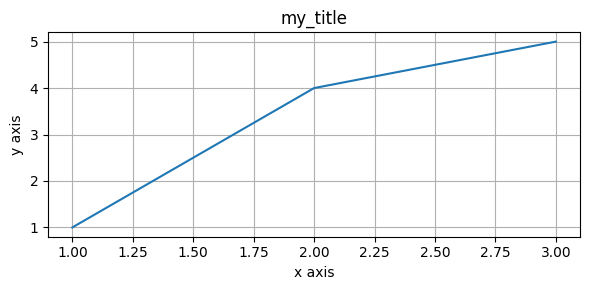

In [1]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot([1,2,3], [1, 4, 5])
ax.set_xlabel('x axis')    # a label to the x axis
ax.set_ylabel('y axis')    # a label to the y axis
ax.set_title('my_title')   # a title to the ax

A grid is set using `ax.grid()`:

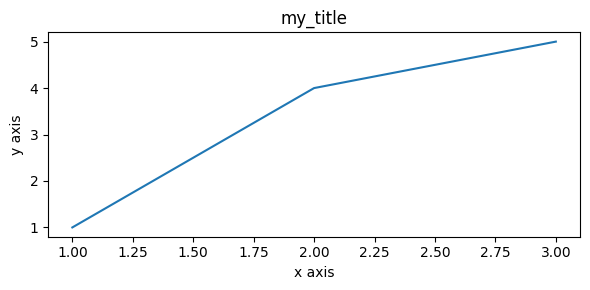

In [2]:
ax.grid()
fig

_Note_: in a Jupyter notebook, figures are automatically displayed after some content is plotted. Yet, one can display them again (in another cell) using the `fig.show()` method.




### Annotations

Let's add a small text near the plotted area, using `annotate`.

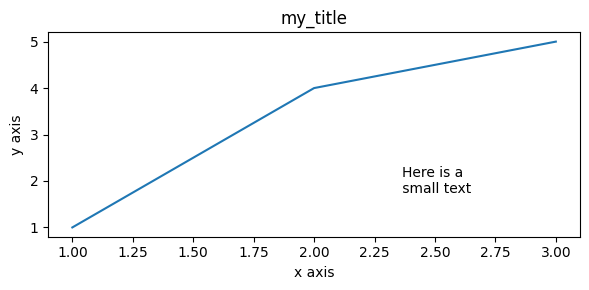

In [3]:
ax.annotate('Here is a \n small text', xy=(2.5, 2), xytext=(2.5, 2),
            va="center", # vertical alignment of the text
            ha="center"  # horizontal alignment
           )
fig

An arrow might be needed to describe some specific features of the plot! 

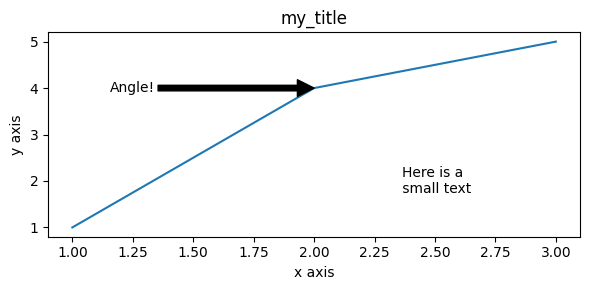

In [4]:
ax.annotate('Angle!', xy=(2, 4), xytext=(1.25, 4),
            arrowprops={"facecolor":'black'}, 
           va="center", ha="center")
fig

### Mathematical content

Mathematical formulas can be displayed too: a __Latex-style mathematical content__ must be inserted between __`$`__ signs, with a `r` in front of the strings:

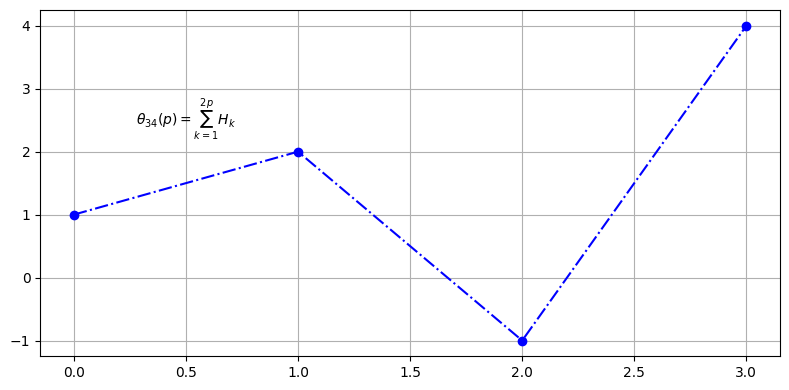

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot([1,2,-1, 4], 'o-.b')     # no x values specified: 
                                 # matplotlib assumes they are `range(len(y))`
formula = r'$\theta_{34}(p)=\sum_{k=1}^{2p}{H_k}$'
_ = ax.annotate(formula, 
                xy=(0.5, 2.5), xytext=(0.5, 2.5),
                va="center", ha="center")

## Other customizations

Many other tuning options exist. For instance:

- axis scale: linear, logarithmic, etc...
- ticks positions and labels



Below is a more advanced example:

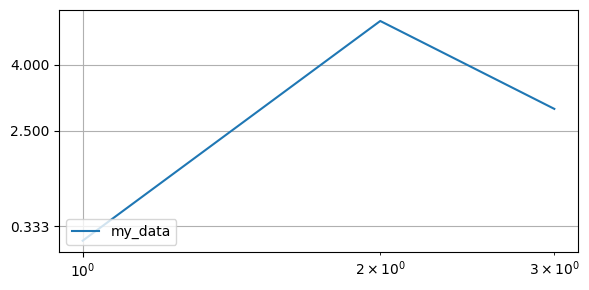

In [6]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot([1,2,3], [0, 5, 3], label="my_data")
ax.set_xscale("log")           # set log scale for x axis
ax.set_yticks([1/3, 2.5, 4])   # set custom position for y ticks
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.5f"))  # show labels with more precision for y axis
ax.legend(loc='lower left')    # choose the location of legend

## Default parameters

Other appearance settings of `matplotlib` are numerous:

- font size and family
- colors
- ...

These parameters can be modified:

- at the script level only
- at system-wide level: will be applied for all future figures

### Local modification

One need to mofify the __`rcParams`__ attribute __before__ importing `matplotlib.pyplot` everything else that uses `matplotlib`.

Below is an example of modification:

- a dash grid is forced
- font size is set to 20

All plots in __this script__ of will use these parameters.

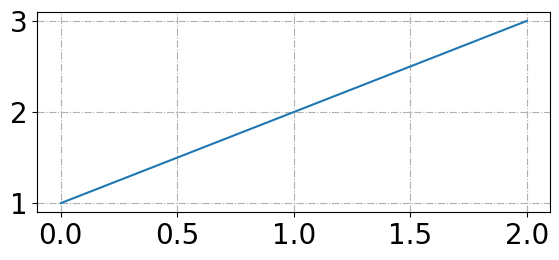

In [7]:
import matplotlib as mpl
mpl.rcParams["font.size"] = 20
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.linestyle"] = "-."


fig, ax = plt.subplots(figsize=(6, 3))
ax.plot([1,2,3])

If you mess up with `mpl.rcParams`, original settings can be reloaded using :

In [8]:
mpl.rcParams.update(mpl.rcParamsDefault)

### System level modification

One can modify the file where `matplotlib` store the default parameters. This is the simplest solution to set parameters once for all.

1. Find where is the parameters file using `mpl.matplotlib_fname()`
2. Save it elsewhere so that you can revert your changes if needed
3. Edit this file

In [14]:
print('On my computer, the file lies in: \n...', mpl.matplotlib_fname()[12:], sep='')

On my computer, the file lies in: 
.../Python/3.12/lib/python3.12/site-packages/matplotlib/mpl-data/matplotlibrc


## Advice

Customizing a plot can be very time-consuming. You must do it  __at the last time__, for instance when the figure is shared with other people (article , poster, presentation, ...).